# Bigfoot, Big Data
### Understanding Patterns in Bigfoot Sightings Using Data Analysis
Julia Novakoff

EM212: Applied Data Science

## Introduction
Bigfoot, the hairy, large-footed figure that lurks in the wilderness has fascinated people in North America for centuries.  Sightings of this legendary creature have been reported thousands upon thousands of times, and those who claim to have seen him have meticulously reported each instance.  Whether you are a believer or not, the wealth of data on Bigfoot sightings is fascinating.  This project will use data analysis to uncover patterns in Bigfoot sightings in an effort to provide data-driven insight into this cultural phenomenon.  

Bigfoot Field Researchers Organization (BFRO) has collected a mass of Bigfoot sighting reports from North America dating back to 1921.1  Past analysis of this data has allowed us to see patterns in Bigfoot sightings geographically.  There are significant concentrations of Bigfoot sightings in the Pacific Northwest as well as Florida.2  Additionally, weather conditions, alcohol consumption, and the media have been investigated as potential drivers of Bigfoot sightings.3  This project aims to replicate some of the existing analysis on the data of Bigfoot sightings with some additional insights.  

### The Data Set
The Bigfoot Field Researchers Organization (BFRO) has accumulated the most extensive set of Bigfoot sighting reports.  It is the most trusted organization in research related to the Bigfoot mystery.  The dataset that will be used for this project was obtained from the following link: https://data.world/timothyrenner/bfro-sightings-data

The dataset contains all full text reports scraped from the BFRO website joined with the location of each report and the weather conditions for each location at that particular time.  The dataset has been cleaned for invalid time values and latitude/longitude values.  The dataset contains many variables of interest, including full text of the report, date, latitude, longitude, temperature, cloud coverage, wind speed, precipitation, and moon phase.  


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from datetime import datetime
import numpy as np

bigfoot = pd.read_csv('./bfro_reports.csv')

## Frequency of reports by state:
plots number of reports by state for the top 10 most reported states

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

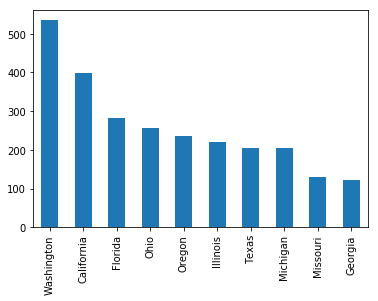

In [36]:
bigfoot.state.value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='center')

## Cleaning data - removing rows with no date value:
Creates a new dataframe, df, that has removed all rows with null date values

In [37]:
df = pd.DataFrame(bigfoot)
df['date'].replace('', np.nan, inplace=True)
df.dropna(subset=['date'], inplace=True)

Creates a new column in the dataframe with the date values converted to datetime

In [38]:
df['date_parsed'] = pd.to_datetime(df['date'], format = "%Y/%m/%d")

In [39]:
counts_by_year = df['date_parsed'].dt.year.value_counts()
counts_by_month = df['date_parsed'].dt.month.value_counts()

# Frequency of reports by year
Takes the number of reports for each year and plots frequency on a graph

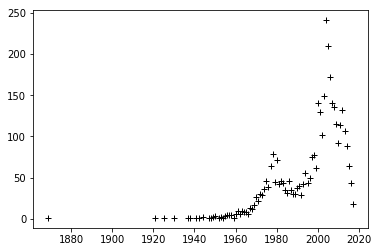

In [40]:
plt.plot(counts_by_year, "k+")

For the life of me I could not figure out how to make this show up properly as a line graph.  The lines connected horizontally instead of vertically, no clue why. But you can still see an interesting spike in bigfoot sightings after Y2K. The years with the most reports are 2004, 2005 and 2006.

## Analysis of Full-text reports

removing data with null 'observed' values

In [41]:
df2 = pd.DataFrame(df)
df2['observed'].replace('', np.nan, inplace=True)
df2.dropna(subset=['observed'], inplace=True)

parsing each individual word and summing individual the word counts

In [ ]:
reports = df2['observed'].str.lower()
word_counts = reports.str.split(expand=True).stack().value_counts()
word_counts.head(10)

# Discussion

## What this report includes
### Data Cleaning
I am proud of what I accomplished in under a week in terms of cleaning my data to make it more useful for analysis.  I learned how to parse the dates and words from full-text reports.  Considering what we have learned, it would have been impossible for me to get to all of the analysis in my project proposal, but I have learned a few useful skills that I can use to continue this work in the future.
### Data Visualization
While there was much more I wanted to do in terms of data visualization, I did manage to figure out how to create some basic plots that showed some interesting trends.

## What this report does not include
I did not end up getting to merge in an additional dataset. This dataset is already merged with weather data, so I did not have time to think through what dataset would be good to merge, and I did not find a suitable dataset online.  I also did not run a machine learning model because I never learned how.